In [7]:
import sys
sys.path.append("/users/munozr/mycodes")
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import LinData
import pandas as pd
import h5py
from data_analysis_codes.tools import NumMethods
from data_analysis_codes.tools import FD as FD_File
from data_analysis_codes.tools import Ricci_CoGrad_Weyl as RCW_file
from data_analysis_codes.tools import TAradius

In [8]:
#param = RRead.read_parameters('pflrw_d3e2_L1206_t1_N32_EdS_nnCL_CosmoPuncture')
param = RRead.read_parameters('pflrw_d3e2_L1206_t1_N32_EdS_spin_CosmoPuncture')
#param = RRead.read_parameters('pflrw_d3e3_L1000_t3e2_N32_EdS_mK')
Lin = LinData.LinData_Class(param)
fevo = pd.read_table(param['datapath']+'h5_data.csv', delimiter=',')
FD = FD_File.FD_Class(param['dx'], param['dy'], param['dz'])
RCW = RCW_file.Ricci_CoGrad_Weyl_Class(FD)
TAr = TAradius.TA_Class(param, Lin, [[8], [8], [8]])

 read time file


Text(0.5, 0, 'tau')

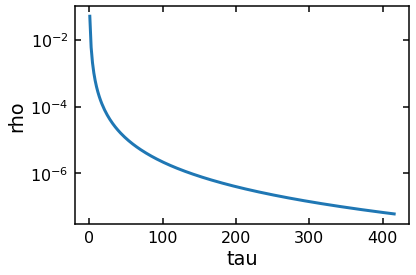

In [4]:
plt.semilogy(fevo['t'], fevo['rho_OD'])
plt.ylabel('rho')
plt.xlabel('tau')

Text(0.5, 0, 'tau')

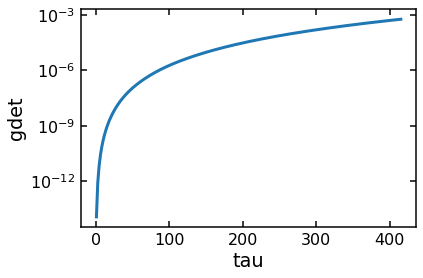

In [6]:
plt.semilogy(fevo['t'], fevo['gdet_OD'])
plt.ylabel('gdet')
plt.xlabel('tau')

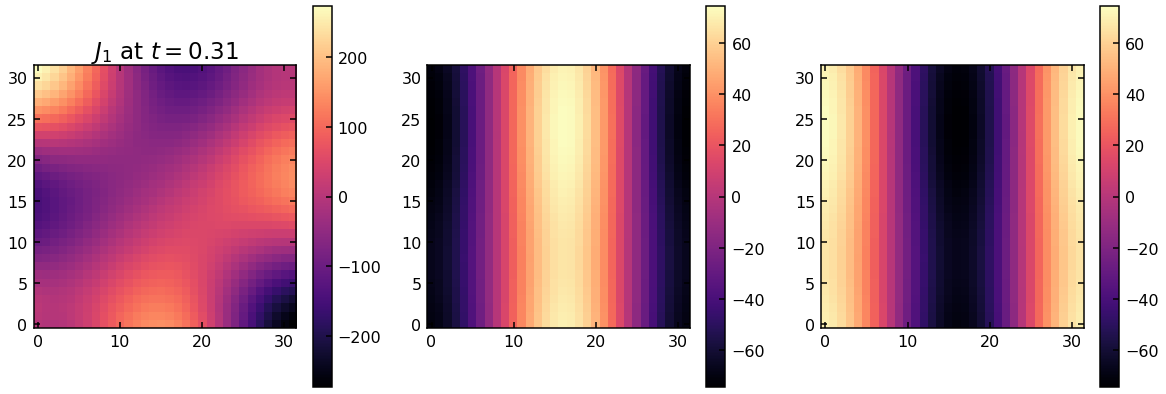

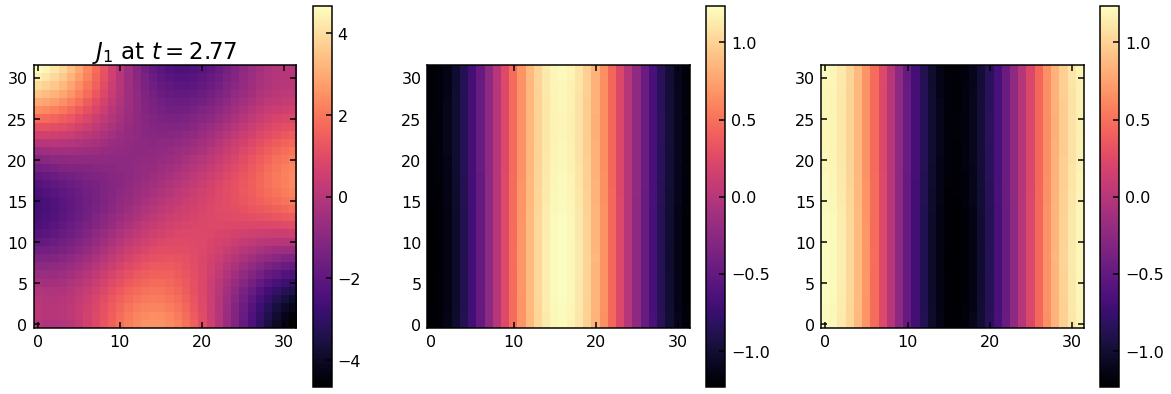

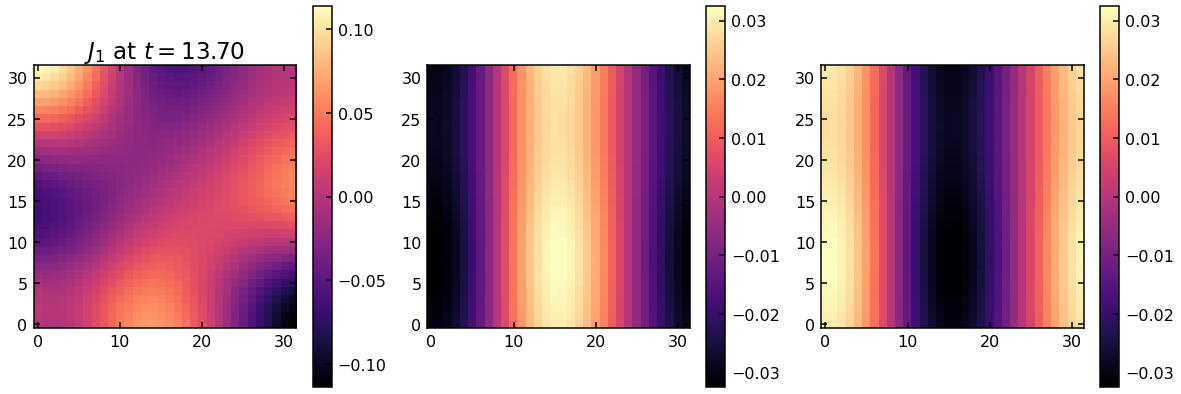

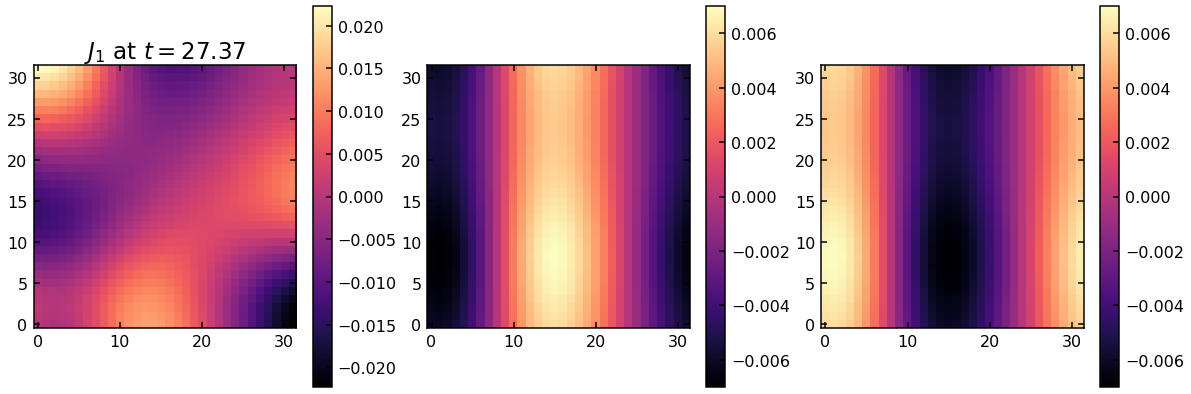

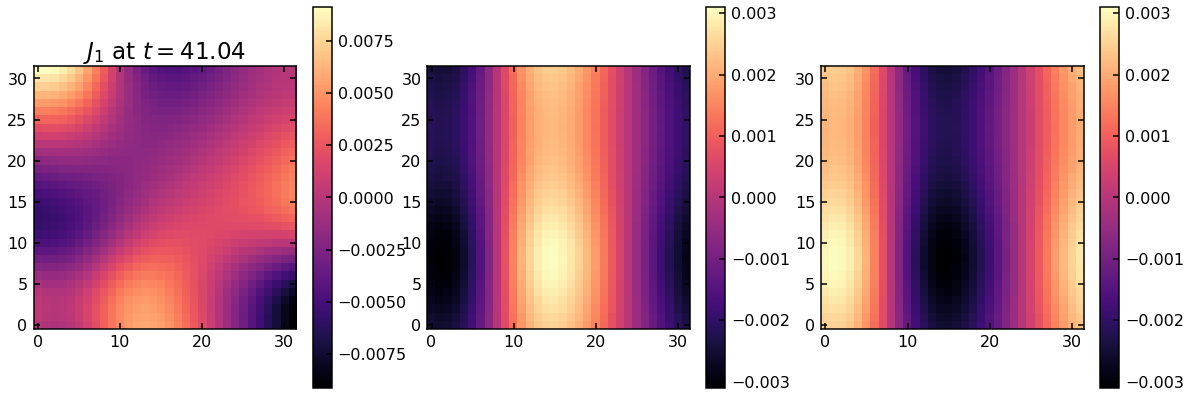

In [15]:
for it in [100, 1000, 5000, 10000, 15000]:
    t = fevo['t'][int(it/param['IOHDF5::out_every'])]
    
    # Collect data
    f = h5py.File('{}_it_{:06d}.hdf5'.format(param['h5datapath'] + param['simname'], it), 'r') 
    thorn_name = 'TMUNUBASE'
    Tdata = {}
    for var_name in ['eTtt', 'eTtx', 'eTty', 'eTtz', 'eTxx', 'eTxy', 'eTxz', 'eTyy', 'eTyz', 'eTzz']:
        Tdata[var_name] = RRead.fixij(f[thorn_name + '::{} it={} tl=0'.format(var_name, it) 
                         + ' rl={}'.format(param['max_refinement_levels'] - 1)])
        Tdata[var_name] = RRead.cut0(Tdata[var_name], param['ghost_size'], param['Nx'])
    Tdown4 = np.array([[Tdata['eTtt'],Tdata['eTtx'],Tdata['eTty'],Tdata['eTtz']],
                       [Tdata['eTtx'],Tdata['eTxx'],Tdata['eTxy'],Tdata['eTxz']],
                       [Tdata['eTty'],Tdata['eTxy'],Tdata['eTyy'],Tdata['eTyz']],
                       [Tdata['eTtz'],Tdata['eTxz'],Tdata['eTyz'],Tdata['eTzz']]])
    thorn_name = 'ADMBASE'
    Tdata = {}
    for var_name in ['gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 
                     'alp']:#, 'betax', 'betay', 'betaz']:
        Tdata[var_name] = RRead.fixij(f[thorn_name + '::{} it={} tl=0'.format(var_name, it) 
                         + ' rl={}'.format(param['max_refinement_levels'] - 1)])
        Tdata[var_name] = RRead.cut0(Tdata[var_name], param['ghost_size'], param['Nx'])
    gdown3 = np.array([[Tdata['gxx'],Tdata['gxy'],Tdata['gxz']],
                       [Tdata['gxy'],Tdata['gyy'],Tdata['gyz']],
                       [Tdata['gxz'],Tdata['gyz'],Tdata['gzz']]])
    nup4 = np.array([np.ones(np.shape(Tdata['alp'])), 
                     np.zeros(np.shape(Tdata['alp'])), np.zeros(np.shape(Tdata['alp'])), np.zeros(np.shape(Tdata['alp']))])/Tdata['alp']
    #                 -Tdata['betax'], -Tdata['betay'], -Tdata['betaz']])/Tdata['alp']

    # Calculate
    gup3 = RRead.inv3(gdown3)
    Sup3 = -np.einsum('ij...,a...,ja...->i...', gup3, nup4, Tdown4[1:])
    xi = np.array([Lin.d3x, Lin.d3y, Lin.d3z])
    LC = RCW.LeviCivita3symbol(param['Nx'], param['Ny'], param['Nz'])
    Jdown3 = np.einsum('ijk...,j...,k...->i...', LC, xi, Sup3)
    
    # Plot
    plt.figure(figsize=(20,7))
    plt.subplot(131)
    plt.imshow(Jdown3[0,8,:,:])
    plt.title(r'$J_1$ at $t=$'+'{:.2f}'.format(t))
    plt.colorbar()
    plt.subplot(132)
    plt.imshow(Jdown3[0,:,8,:])
    plt.colorbar()
    plt.subplot(133)
    plt.imshow(Jdown3[0,:,:,8])
    plt.colorbar()

 read time file


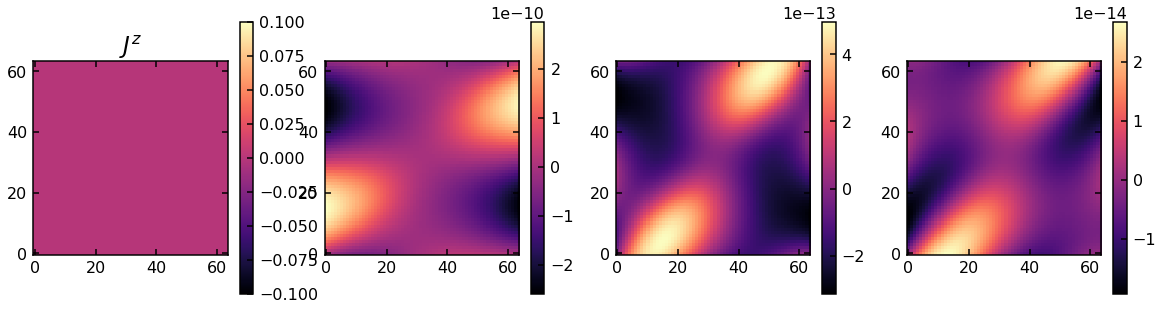

In [19]:
param = RRead.read_parameters('pflrw_d3e2_L1206_t1_N64_EdS_GRH_spin_CosmoPuncture')
Lin = LinData.LinData_Class(param)
plt.figure(figsize=(20,5))
i = 1
for it in [0, 10000, 20000, 30000]:
    #t = fevo['t'][int(it/param['IOHDF5::out_every'])]
    
    # Collect data
    f = h5py.File('{}_it_{:06d}.hdf5'.format(param['h5datapath'] + param['simname'], it), 'r') 
    thorn_name = 'TMUNUBASE'
    Tdata = {}
    for var_name in ['eTtt', 'eTtx', 'eTty', 'eTtz', 'eTxx', 'eTxy', 'eTxz', 'eTyy', 'eTyz', 'eTzz']:
        Tdata[var_name] = RRead.fixij(f[thorn_name + '::{} it={} tl=0'.format(var_name, it) 
                         + ' rl={}'.format(param['max_refinement_levels'] - 1)])
        Tdata[var_name] = RRead.cut0(Tdata[var_name], param['ghost_size'], param['Nx'])
    Tdown4 = np.array([[Tdata['eTtt'],Tdata['eTtx'],Tdata['eTty'],Tdata['eTtz']],
                       [Tdata['eTtx'],Tdata['eTxx'],Tdata['eTxy'],Tdata['eTxz']],
                       [Tdata['eTty'],Tdata['eTxy'],Tdata['eTyy'],Tdata['eTyz']],
                       [Tdata['eTtz'],Tdata['eTxz'],Tdata['eTyz'],Tdata['eTzz']]])
    thorn_name = 'ADMBASE'
    Tdata = {}
    for var_name in ['gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 
                     'alp']:#, 'betax', 'betay', 'betaz']:
        Tdata[var_name] = RRead.fixij(f[thorn_name + '::{} it={} tl=0'.format(var_name, it) 
                         + ' rl={}'.format(param['max_refinement_levels'] - 1)])
        Tdata[var_name] = RRead.cut0(Tdata[var_name], param['ghost_size'], param['Nx'])
    gdown3 = np.array([[Tdata['gxx'],Tdata['gxy'],Tdata['gxz']],
                       [Tdata['gxy'],Tdata['gyy'],Tdata['gyz']],
                       [Tdata['gxz'],Tdata['gyz'],Tdata['gzz']]])
    nup4 = np.array([np.ones(np.shape(Tdata['alp'])), 
                     np.zeros(np.shape(Tdata['alp'])), np.zeros(np.shape(Tdata['alp'])), np.zeros(np.shape(Tdata['alp']))])/Tdata['alp']
    #                 -Tdata['betax'], -Tdata['betay'], -Tdata['betaz']])/Tdata['alp']

    # Calculate
    gup3 = RRead.inv3(gdown3)
    Sup3 = -np.einsum('ij...,a...,ja...->i...', gup3, nup4, Tdown4[1:])
    xi = np.array([Lin.d3x, Lin.d3y, Lin.d3z])
    LC = RCW.LeviCivita3symbol(param['Nx'], param['Ny'], param['Nz'])
    Jdown3 = np.einsum('ijk...,j...,k...->i...', LC, xi, Sup3)
    Jup3 = np.einsum('im...,m...->i...', gup3, Jdown3)
    
    # Plot
    plt.subplot(140+i)
    icent = int(param['Nx']/2)
    plt.imshow(Jup3[2,:,:,icent])
    if i==1:
        plt.title(r'$J^z$')
    plt.colorbar()
    i+=1

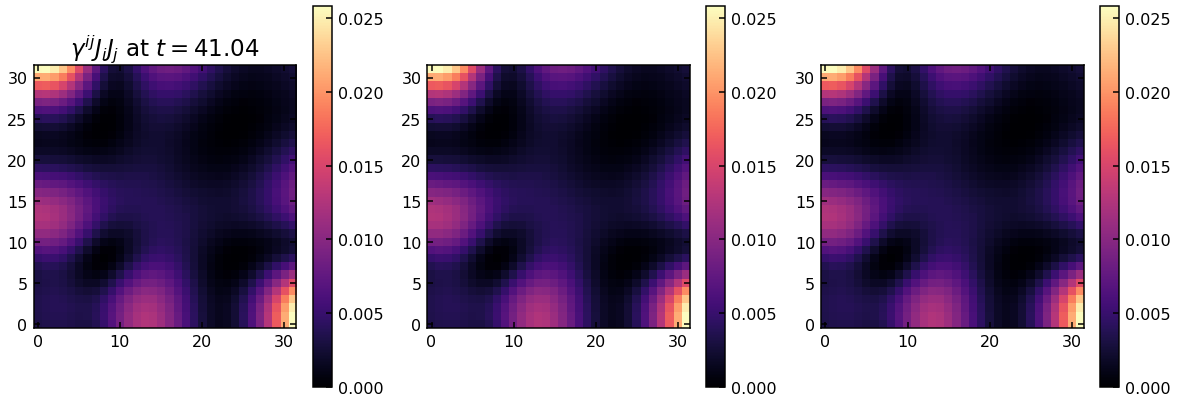

In [16]:
Jnorm = np.einsum('ij...,i...,j...->...', gup3, Jdown3, Jdown3)
plt.figure(figsize=(20,7))
plt.subplot(131)
plt.imshow(Jnorm[8,:,:])
plt.title(r'$\gamma^{ij}J_i J_j$ at $t=$'+'{:.2f}'.format(t))
plt.colorbar()
plt.subplot(132)
plt.imshow(Jnorm[:,8,:])
plt.colorbar()
plt.subplot(133)
plt.imshow(Jnorm[:,:,8])
plt.colorbar()

In [17]:
Sxmax, Symax, Szmax = [], [], []
Jxmax, Jymax, Jzmax = [], [], []
for it in fevo['it'][:imax]:
    
    # Collect data
    it = int(it)
    f = h5py.File('{}_it_{:06d}.hdf5'.format(param['h5datapath'] + param['simname'], it), 'r') 
    thorn_name = 'TMUNUBASE'
    Tdata = {}
    for var_name in ['eTtt', 'eTtx', 'eTty', 'eTtz', 'eTxx', 'eTxy', 'eTxz', 'eTyy', 'eTyz', 'eTzz']:
        Tdata[var_name] = RRead.fixij(f[thorn_name + '::{} it={} tl=0'.format(var_name, it) 
                         + ' rl={}'.format(param['max_refinement_levels'] - 1)])
        Tdata[var_name] = RRead.cut0(Tdata[var_name], param['ghost_size'], param['Nx'])
    Tdown4 = np.array([[Tdata['eTtt'],Tdata['eTtx'],Tdata['eTty'],Tdata['eTtz']],
                       [Tdata['eTtx'],Tdata['eTxx'],Tdata['eTxy'],Tdata['eTxz']],
                       [Tdata['eTty'],Tdata['eTxy'],Tdata['eTyy'],Tdata['eTyz']],
                       [Tdata['eTtz'],Tdata['eTxz'],Tdata['eTyz'],Tdata['eTzz']]])
    thorn_name = 'ADMBASE'
    Tdata = {}
    for var_name in ['gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 
                     'alp']:#, 'betax', 'betay', 'betaz']:
        Tdata[var_name] = RRead.fixij(f[thorn_name + '::{} it={} tl=0'.format(var_name, it) 
                         + ' rl={}'.format(param['max_refinement_levels'] - 1)])
        Tdata[var_name] = RRead.cut0(Tdata[var_name], param['ghost_size'], param['Nx'])
    gdown3 = np.array([[Tdata['gxx'],Tdata['gxy'],Tdata['gxz']],
                       [Tdata['gxy'],Tdata['gyy'],Tdata['gyz']],
                       [Tdata['gxz'],Tdata['gyz'],Tdata['gzz']]])
    nup4 = np.array([np.ones(np.shape(Tdata['alp'])), 
                     np.zeros(np.shape(Tdata['alp'])), np.zeros(np.shape(Tdata['alp'])), np.zeros(np.shape(Tdata['alp']))])/Tdata['alp']
    #                 -Tdata['betax'], -Tdata['betay'], -Tdata['betaz']])/Tdata['alp']
    
    # Calculate
    gup3 = RRead.inv3(gdown3)
    Sup3 = -np.einsum('ij...,a...,ja...->i...', gup3, nup4, Tdown4[1:])
    
    xi = np.array([Lin.d3x, Lin.d3y, Lin.d3z])
    LC = RCW.LeviCivita3symbol(param['Nx'], param['Ny'], param['Nz'])
    Jdown3 = np.einsum('ijk...,j...,k...->i...', LC, xi, Sup3)
    
    # Take max(abs())
    Sxmax += [np.max(abs(Sup3[0]))]
    Symax += [np.max(abs(Sup3[1]))]
    Szmax += [np.max(abs(Sup3[2]))]
    
    Jxmax += [np.max(abs(Jdown3[0]))]
    Jymax += [np.max(abs(Jdown3[1]))]
    Jzmax += [np.max(abs(Jdown3[2]))]

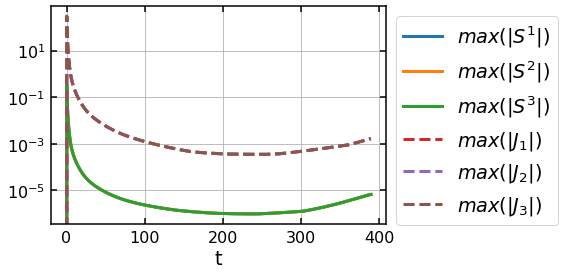

In [20]:
plt.semilogy(fevo['t'][:imax], Sxmax[:imax], label=r'$max(|S^1|)$')
plt.semilogy(fevo['t'][:imax], Symax[:imax], label=r'$max(|S^2|)$')
plt.semilogy(fevo['t'][:imax], Szmax[:imax], label=r'$max(|S^3|)$')
plt.semilogy(fevo['t'][:imax], Jxmax[:imax], linestyle='--', label=r'$max(|J_1|)$')
plt.semilogy(fevo['t'][:imax], Jymax[:imax], linestyle='--', label=r'$max(|J_2|)$')
plt.semilogy(fevo['t'][:imax], Jzmax[:imax], linestyle='--', label=r'$max(|J_3|)$')
plt.grid()
plt.xlabel('t')
plt.legend(bbox_to_anchor=(1,1))

In [21]:
# Collect data
Jxmax, Jymax, Jzmax = [], [], []
for it in fevo['it'][:imax]:
    # Collect data
    it = int(it)
    f = h5py.File('{}_it_{:06d}.hdf5'.format(param['h5datapath'] + param['simname'], it), 'r') 
    thorn_name = 'TMUNUBASE'
    Tdata = {}
    for var_name in ['eTtt', 'eTtx', 'eTty', 'eTtz', 'eTxx', 'eTxy', 'eTxz', 'eTyy', 'eTyz', 'eTzz']:
        Tdata[var_name] = RRead.fixij(f[thorn_name + '::{} it={} tl=0'.format(var_name, it) 
                             + ' rl={}'.format(param['max_refinement_levels'] - 1)])
        Tdata[var_name] = RRead.cut0(Tdata[var_name], param['ghost_size'], param['Nx'])
    Tdown4 = np.array([[Tdata['eTtt'],Tdata['eTtx'],Tdata['eTty'],Tdata['eTtz']],
                           [Tdata['eTtx'],Tdata['eTxx'],Tdata['eTxy'],Tdata['eTxz']],
                           [Tdata['eTty'],Tdata['eTxy'],Tdata['eTyy'],Tdata['eTyz']],
                           [Tdata['eTtz'],Tdata['eTxz'],Tdata['eTyz'],Tdata['eTzz']]])
    thorn_name = 'ADMBASE'
    Tdata = {}
    for var_name in ['gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 
                         'alp']:#, 'betax', 'betay', 'betaz']:
        Tdata[var_name] = RRead.fixij(f[thorn_name + '::{} it={} tl=0'.format(var_name, it) 
                             + ' rl={}'.format(param['max_refinement_levels'] - 1)])
        Tdata[var_name] = RRead.cut0(Tdata[var_name], param['ghost_size'], param['Nx'])
    gdown3 = np.array([[Tdata['gxx'],Tdata['gxy'],Tdata['gxz']],
                           [Tdata['gxy'],Tdata['gyy'],Tdata['gyz']],
                           [Tdata['gxz'],Tdata['gyz'],Tdata['gzz']]])
    nup4 = np.array([np.ones(np.shape(Tdata['alp'])), 
                     np.zeros(np.shape(Tdata['alp'])), np.zeros(np.shape(Tdata['alp'])), np.zeros(np.shape(Tdata['alp']))])/Tdata['alp']
    #                 -Tdata['betax'], -Tdata['betay'], -Tdata['betaz']])/Tdata['alp']

    # Calculate
    gup3 = RRead.inv3(gdown3)
    gdet = RRead.det3(gdown3)
    Sup3 = -np.einsum('ij...,a...,ja...->i...', gup3, nup4, Tdown4[1:])

    # Proper length
    xi = np.zeros((3, param['Nx'], param['Ny'], param['Nz']))
    iy = 7
    iz = 7
    for ix in range(param['Nx']):
        r, theta, phi = TAr.get_proper_Radius_of_grid_point(gdet, (ix, iy, iz))
        xi[0, ix, iy, iz] = r*np.cos(phi)*np.sin(theta)
        xi[1, ix, iy, iz] = r*np.sin(phi)*np.sin(theta)
        xi[2, ix, iy, iz] = r*np.cos(theta)

    # Calculate
    LC = RCW.LeviCivita3symbol(param['Nx'], param['Ny'], param['Nz'])
    Jdown3 = np.einsum('ijk...,j...,k...->i...', LC, xi, Sup3)
    Jxmax += [np.max(abs(Jdown3[0]))]
    Jymax += [np.max(abs(Jdown3[1]))]
    Jzmax += [np.max(abs(Jdown3[2]))]

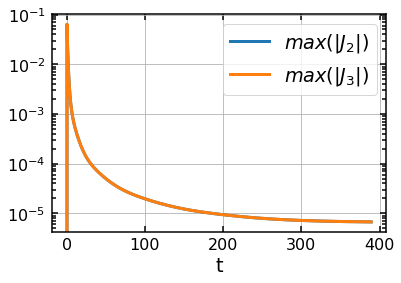

In [22]:
#plt.semilogy(fevo['t'][:imax], Jxmax[:imax], label=r'$max(|J_1|)$')
plt.semilogy(fevo['t'][:imax], Jymax[:imax], label=r'$max(|J_2|)$')
plt.semilogy(fevo['t'][:imax], Jzmax[:imax], label=r'$max(|J_3|)$')
plt.grid()
plt.xlabel('t')
plt.legend(bbox_to_anchor=(1,1))

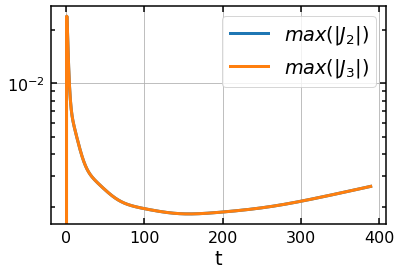

In [23]:
plt.semilogy(fevo['t'][:imax], fevo['t'][:imax]*Jymax[:imax], label=r'$max(|J_2|)$')
plt.semilogy(fevo['t'][:imax], fevo['t'][:imax]*Jzmax[:imax], label=r'$max(|J_3|)$')
plt.grid()
plt.xlabel('t')
plt.legend(bbox_to_anchor=(1,1))